<a href="https://www.kaggle.com/code/shellsquareganeshan/feature-selection-for-regression?scriptVersionId=187610209" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# import libraries
import pandas as pd
from sklearn.feature_selection import SelectKBest, r_regression,mutual_info_regression,VarianceThreshold
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# get data
df=pd.read_csv('/kaggle/input/housedata/data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [3]:
# for demonstration lets drop features other than numerical.
df.drop(['date','street','city','statezip','country'],inplace=True,axis=1)
X=df.drop('price',axis=1)
y=df.price

## Feature selection for regression

>**Filter methods**: These methods evaluate each feature independently and select those that exhibit a strong correlation with the target variable. Common filter methods include Pearson's correlation, mutual information, and variance thresholding.

>**Wrapper methods**: These methods evaluate the relevance of features by embedding the feature selection process within the model training loop. Wrapper methods assess the predictive performance of the model with different subsets of features and select the subset that yields the best performance.

>**Embedded methods**: These methods incorporate feature selection into the model training process itself. Embedded methods, such as Lasso and Ridge regression, assign coefficients to features, and those with coefficients close to zero are considered less relevant and can be excluded from the model.

## 1.Filter methods

## 1.1 Pearson's correlation
>Pearson's correlation coefficient is a measure of the linear relationship between two variables. It ranges from -1 to 1, where -1 indicates a perfect negative linear relationship, 1 indicates a perfect positive linear relationship, and 0 indicates no linear relationship.

In [4]:
# correlation for the entire dataset
corr_matrix = df.corr()
corr_matrix

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
price,1.000000,0.200336,0.327110,0.430410,0.050451,0.151461,0.135648,0.228504,0.034915,0.367570,0.210427,0.021857,-0.028774
bedrooms,0.200336,1.000000,0.545920,0.594884,0.068819,0.177895,-0.003483,0.111028,0.025080,0.484705,0.334165,0.142461,-0.061082
bathrooms,0.327110,0.545920,1.000000,0.761154,0.107837,0.486428,0.076232,0.211960,-0.119994,0.689918,0.298020,0.463498,-0.215886
sqft_living,0.430410,0.594884,0.761154,1.000000,0.210538,0.344850,0.117616,0.311009,-0.062826,0.876443,0.447206,0.287775,-0.122817
sqft_lot,0.050451,0.068819,0.107837,0.210538,1.000000,0.003750,0.017241,0.073907,0.000558,0.216455,0.034842,0.050706,-0.022730
floors,0.151461,0.177895,0.486428,0.344850,0.003750,1.000000,0.022024,0.031211,-0.275013,0.522814,-0.255510,0.467481,-0.233996
waterfront,0.135648,-0.003483,0.076232,0.117616,0.017241,0.022024,1.000000,0.360935,0.000352,0.078911,0.097501,-0.023563,0.008625
view,0.228504,0.111028,0.211960,0.311009,0.073907,0.031211,0.360935,1.000000,0.063077,0.174327,0.321602,-0.064465,0.022967
condition,0.034915,0.025080,-0.119994,-0.062826,0.000558,-0.275013,0.000352,0.063077,1.000000,-0.178196,0.200632,-0.399698,-0.186818
sqft_above,0.367570,0.484705,0.689918,0.876443,0.216455,0.522814,0.078911,0.174327,-0.178196,1.000000,-0.038723,0.408535,-0.160426


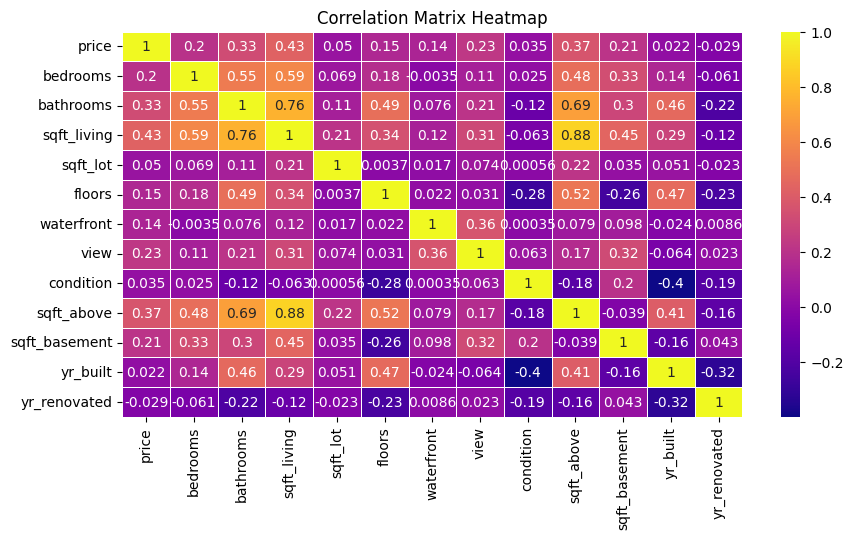

In [5]:
# Create a figure and axis using Matplotlib's plt.subplots()
fig, ax = plt.subplots(figsize=(10, 5))
# Create a heatmap using seaborn on the corr_matrix
heatmap = sns.heatmap(corr_matrix, annot=True, cmap='plasma', linewidths=.5, ax=ax)
heatmap.set_title('Correlation Matrix Heatmap')
plt.show()

>we can also use the r_regression from the sklearn feature_selection to get the correlation with respect to the target variable and the features

In [6]:
# Compute Pearson's correlation coefficients against target variable 
corr_coefficients = r_regression(X,y)
corr_coefficients,len(corr_coefficients)

(array([ 0.20033629,  0.32710992,  0.43041003,  0.0504513 ,  0.1514608 ,
         0.13564832,  0.22850417,  0.03491454,  0.3675696 ,  0.21042657,
         0.02185683, -0.02877365]),
 12)

/tmp/ipykernel_19/3332808372.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(corr.index, rotation=45, ha='right');


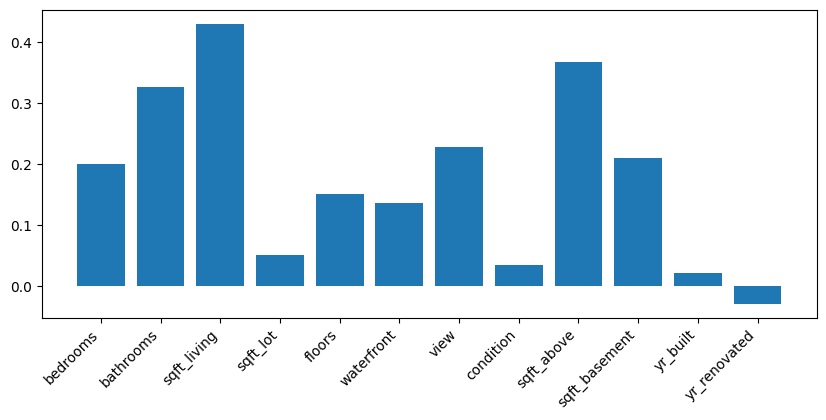

In [7]:
# plot corr in bar chart
corr=pd.Series(corr_coefficients)
corr.index=X.columns
# Plot the correlation
fig,ax=plt.subplots(figsize=(10, 4))
ax.bar(corr.index,corr.values)
ax.set_xticklabels(corr.index, rotation=45, ha='right');

In [8]:
# ues the SelectKBest() to select the k best features according to the function given to calculate the feature importance
mostcorr=SelectKBest(r_regression,k=11)
new_X=mostcorr.fit_transform(X, y)

In [9]:
# k best features
mostcorr.get_feature_names_out()

array(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built'], dtype=object)

In [10]:
# the output of fit transfom is an ndarray so lets change it to a dataframe
pd.DataFrame(new_X,columns=mostcorr.get_feature_names_out())

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built
0,3.0,1.50,1340.0,7912.0,1.5,0.0,0.0,3.0,1340.0,0.0,1955.0
1,5.0,2.50,3650.0,9050.0,2.0,0.0,4.0,5.0,3370.0,280.0,1921.0
2,3.0,2.00,1930.0,11947.0,1.0,0.0,0.0,4.0,1930.0,0.0,1966.0
3,3.0,2.25,2000.0,8030.0,1.0,0.0,0.0,4.0,1000.0,1000.0,1963.0
4,4.0,2.50,1940.0,10500.0,1.0,0.0,0.0,4.0,1140.0,800.0,1976.0
...,...,...,...,...,...,...,...,...,...,...,...
4595,3.0,1.75,1510.0,6360.0,1.0,0.0,0.0,4.0,1510.0,0.0,1954.0
4596,3.0,2.50,1460.0,7573.0,2.0,0.0,0.0,3.0,1460.0,0.0,1983.0
4597,3.0,2.50,3010.0,7014.0,2.0,0.0,0.0,3.0,3010.0,0.0,2009.0
4598,4.0,2.00,2090.0,6630.0,1.0,0.0,0.0,3.0,1070.0,1020.0,1974.0


## 1.2 Mutual information
>Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

>it quantifies the "amount of information" obtained about one random variable by observing the other random variable.

In [11]:
mi_reg = mutual_info_regression(X, y)

In [12]:
mi_reg

array([0.08735048, 0.18383078, 0.33869187, 0.08620964, 0.06423884,
       0.00521938, 0.05397325, 0.0099663 , 0.24421199, 0.06824076,
       0.07180746, 0.        ])

/tmp/ipykernel_19/1366218723.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(mi_reg.index, rotation=45, ha='right');


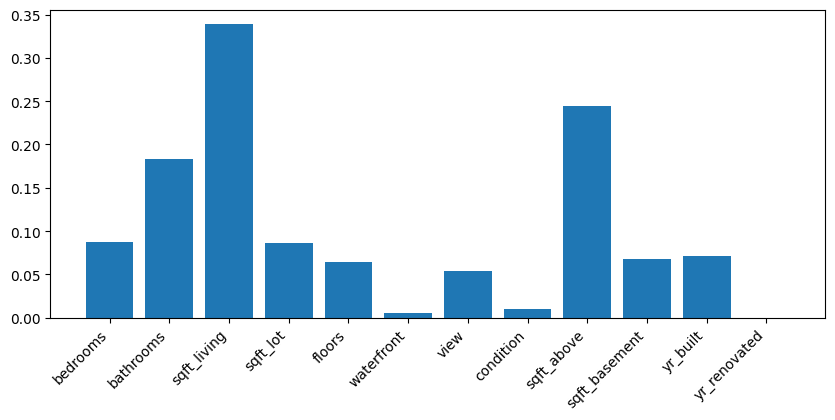

In [13]:
# plot mutual information in bar chart
mi_reg=pd.Series(mi_reg)
mi_reg.index=X.columns
# Plot the correlation
fig,ax=plt.subplots(figsize=(10, 4))
ax.bar(mi_reg.index,mi_reg.values)
ax.set_xticklabels(mi_reg.index, rotation=45, ha='right');

## 1.3 Variance thresholding.
>This feature selection algorithm looks only at the features (X), not the desired outputs (y), and can thus be used for unsupervised learning

>Allows NaN in the input. Raises ValueError if no feature in X meets the variance threshold.

>Features with a training-set variance lower than this threshold will
 be removed. The default is to keep all features with non-zero variance,
 i.e. remove the features that have the same value in all samples.

In [14]:
df.waterfront.var(),df.waterfront.unique()

(0.007123996710059842, array([0, 1]))

In [15]:
selector = VarianceThreshold(0.2)
new_X=selector.fit_transform(X)

In [16]:
# selected features
pd.DataFrame(new_X,columns=selector.get_feature_names_out())

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,3.0,1.50,1340.0,7912.0,1.5,0.0,3.0,1340.0,0.0,1955.0,2005.0
1,5.0,2.50,3650.0,9050.0,2.0,4.0,5.0,3370.0,280.0,1921.0,0.0
2,3.0,2.00,1930.0,11947.0,1.0,0.0,4.0,1930.0,0.0,1966.0,0.0
3,3.0,2.25,2000.0,8030.0,1.0,0.0,4.0,1000.0,1000.0,1963.0,0.0
4,4.0,2.50,1940.0,10500.0,1.0,0.0,4.0,1140.0,800.0,1976.0,1992.0
...,...,...,...,...,...,...,...,...,...,...,...
4595,3.0,1.75,1510.0,6360.0,1.0,0.0,4.0,1510.0,0.0,1954.0,1979.0
4596,3.0,2.50,1460.0,7573.0,2.0,0.0,3.0,1460.0,0.0,1983.0,2009.0
4597,3.0,2.50,3010.0,7014.0,2.0,0.0,3.0,3010.0,0.0,2009.0,0.0
4598,4.0,2.00,2090.0,6630.0,1.0,0.0,3.0,1070.0,1020.0,1974.0,0.0


## 2. Wrapper methods

## 2.1 recursive feature elimination (RFE)
>Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features.
>

In [17]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=6, step=1)
selector = selector.fit(X, y)  # we can also transform X,y using transform()
selector.support_

# selector.ranking_

array([ True,  True,  True, False,  True, False,  True, False, False,
       False,  True, False])

In [18]:
selector.ranking_

array([1, 1, 1, 7, 1, 5, 1, 2, 3, 4, 1, 6])

In [19]:
selector.feature_names_in_

array(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated'], dtype=object)

In [20]:
# get the features selected by RFE
selector.get_feature_names_out()

array(['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'view',
       'yr_built'], dtype=object)

## 3.Embedded methods

## 3.1  L1 regularization 

>If a regression model uses the L1 Regularization technique, then it is called **Lasso Regression**.

>If it used the L2 regularization technique, it’s called **Ridge Regression**

>Regularization consists of adding a penalty to the different parameters of the machine learning model to reduce the freedom of the model, i.e., to avoid over-fitting. In linear model regularization, the penalty is applied over the coefficients that multiply each predictor. 

>From the different types of regularization, Lasso or L1 has the property that can shrink some of the coefficients to zero. Therefore, that feature can be removed from the model.

In [21]:
from sklearn.linear_model import Lasso
import numpy as np

# Assuming X is your feature matrix and y is your target variable
model = Lasso()  # Adjust alpha based on the strength of regularization
model.fit(X, y)
# Get the absolute values of the coefficients
absolute_coefficients = np.abs(model.coef_)
# Create a dictionary to store feature names and their corresponding importance scores
feature_importance = dict(zip(X.columns, absolute_coefficients))
# Sort features by importance (descending order)
sorted_feature_importance = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)
# Print the sorted feature importance
for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance}")

waterfront: 355188.2835866439
bedrooms: 58040.430333029115
bathrooms: 57195.643770650786
view: 45703.27803640003
floors: 39803.07927445879
condition: 31839.601672487177
yr_built: 2378.2125462576337
sqft_living: 270.4018038184782
sqft_basement: 38.615042333472324
sqft_above: 8.949145945961357
yr_renovated: 6.571367112846598
sqft_lot: 0.6912597710369816


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.254e+14, tolerance: 1.462e+11
  model = cd_fast.enet_coordinate_descent(


## 3.2 decision tree

>Decision trees and ensemble methods like Random Forests can be used to identify feature importance

In [22]:
from sklearn.tree import DecisionTreeRegressor
# Create DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(random_state=42)
# Fit the model
dt_reg.fit(X, y)

# Get feature importances
feature_importances = dt_reg.feature_importances_

feature_importance = dict(zip(X.columns, feature_importances))
# Sort features by importance (descending order)
sorted_feature_importance = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)
# Print the sorted feature importance
for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance}")


condition: 0.3209730204313103
sqft_living: 0.24184178177680754
yr_built: 0.18196265358434766
yr_renovated: 0.060132977106418795
sqft_basement: 0.05248355610838829
sqft_lot: 0.049378553949720294
sqft_above: 0.023474968631936065
bathrooms: 0.019685227150124874
view: 0.018922712873882364
waterfront: 0.017303093541938895
bedrooms: 0.009826254604169887
floors: 0.004015200240955045
